<a href="https://colab.research.google.com/github/pratyushhaihum/sales-forecasting-nsp-/blob/main/Sales_forecasting_(Add_ons).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

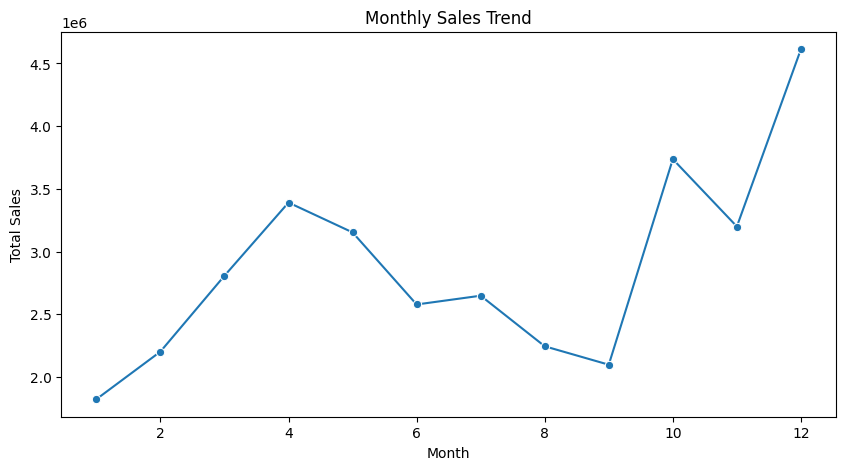

<ipython-input-1-262915461a8d>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


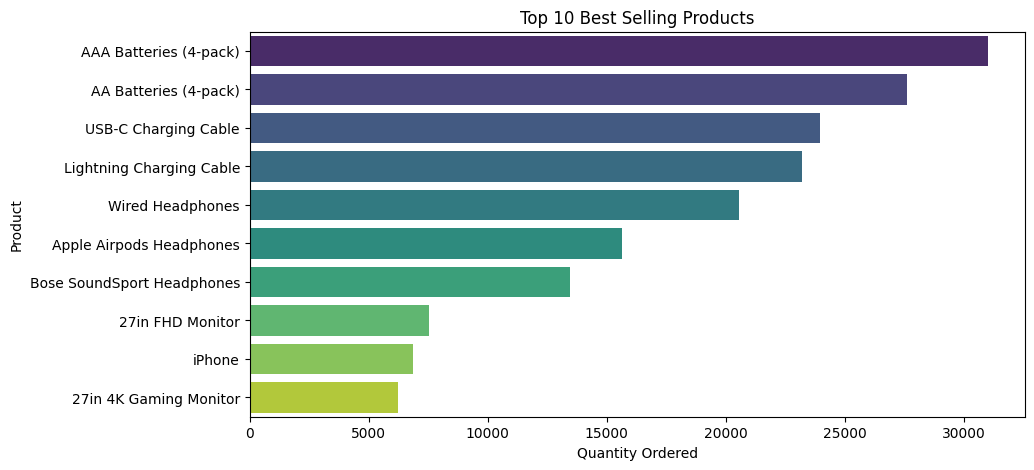

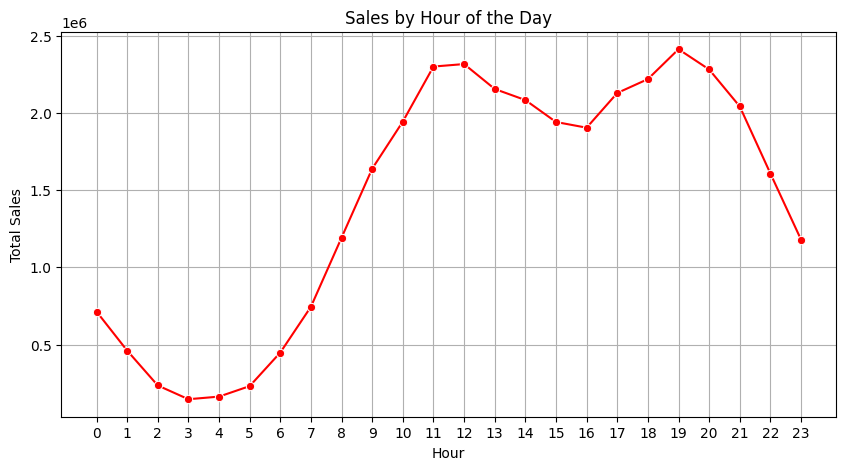

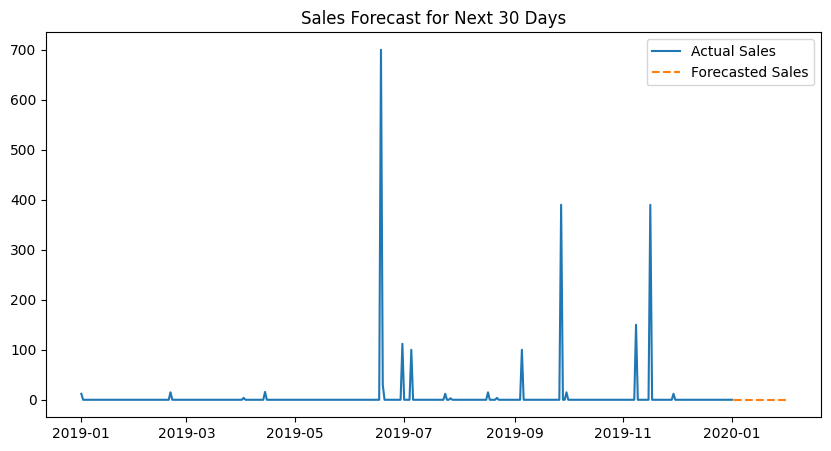

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

# Load dataset
df = pd.read_csv("Sales Data.csv")

# Data Cleaning
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df.dropna(inplace=True)
df['Month'] = df['Order Date'].dt.month
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

def plot_monthly_sales(df):
    monthly_sales = df.groupby('Month')['Sales'].sum()
    plt.figure(figsize=(10,5))
    sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
    plt.title('Monthly Sales Trend')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.show()

def plot_top_products(df):
    top_products = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
    plt.title('Top 10 Best Selling Products')
    plt.xlabel('Quantity Ordered')
    plt.ylabel('Product')
    plt.show()

def plot_sales_by_hour(df):
    hourly_sales = df.groupby('Hour')['Sales'].sum()
    plt.figure(figsize=(10,5))
    sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker='o', color='red')
    plt.title('Sales by Hour of the Day')
    plt.xlabel('Hour')
    plt.ylabel('Total Sales')
    plt.xticks(range(0, 24))
    plt.grid()
    plt.show()

# Forecasting Sales using ARIMA
def forecast_sales(df):
    sales_series = df.groupby('Order Date')['Sales'].sum()
    sales_series = sales_series.asfreq('D').fillna(0)

    model = ARIMA(sales_series, order=(5,1,0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=30)

    plt.figure(figsize=(10,5))
    plt.plot(sales_series, label='Actual Sales')
    plt.plot(forecast, label='Forecasted Sales', linestyle='dashed')
    plt.title('Sales Forecast for Next 30 Days')
    plt.legend()
    plt.show()

# Run Analysis
plot_monthly_sales(df)
plot_top_products(df)
plot_sales_by_hour(df)
forecast_sales(df)